In [7]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from collections import Counter

# Config
DATA_PATH = Path("../data/raw/soil-classification/Orignal-Dataset")

In [8]:
# List classes
classes = sorted([d for d in os.listdir(DATA_PATH) if not d.startswith('.')])
print(f"Soil classes ({len(classes)}):")
for c in classes:
    print(f"  • {c}")

Soil classes (7):
  • Alluvial_Soil
  • Arid_Soil
  • Black_Soil
  • Laterite_Soil
  • Mountain_Soil
  • Red_Soil
  • Yellow_Soil


In [9]:
# Count images
class_counts = {}
for cls in classes:
    cls_path = DATA_PATH / cls
    images = [f for f in os.listdir(cls_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    class_counts[cls] = len(images)

for cls, count in sorted(class_counts.items(), key=lambda x: -x[1]):
    print(f"{cls}: {count} images")

print(f"\nTotal: {sum(class_counts.values())} images")

Arid_Soil: 284 images
Black_Soil: 255 images
Laterite_Soil: 219 images
Mountain_Soil: 201 images
Red_Soil: 109 images
Yellow_Soil: 69 images
Alluvial_Soil: 51 images

Total: 1188 images


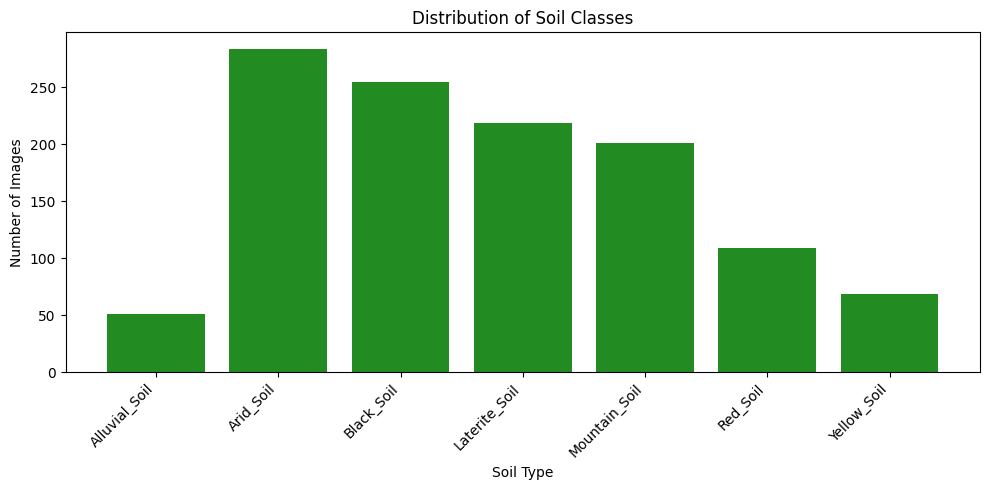

In [10]:
# Barplot of distribution
plt.figure(figsize=(10, 5))
plt.bar(class_counts.keys(), class_counts.values(), color='forestgreen')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Soil Type')
plt.ylabel('Number of Images')
plt.title('Distribution of Soil Classes')
plt.tight_layout()
plt.show()

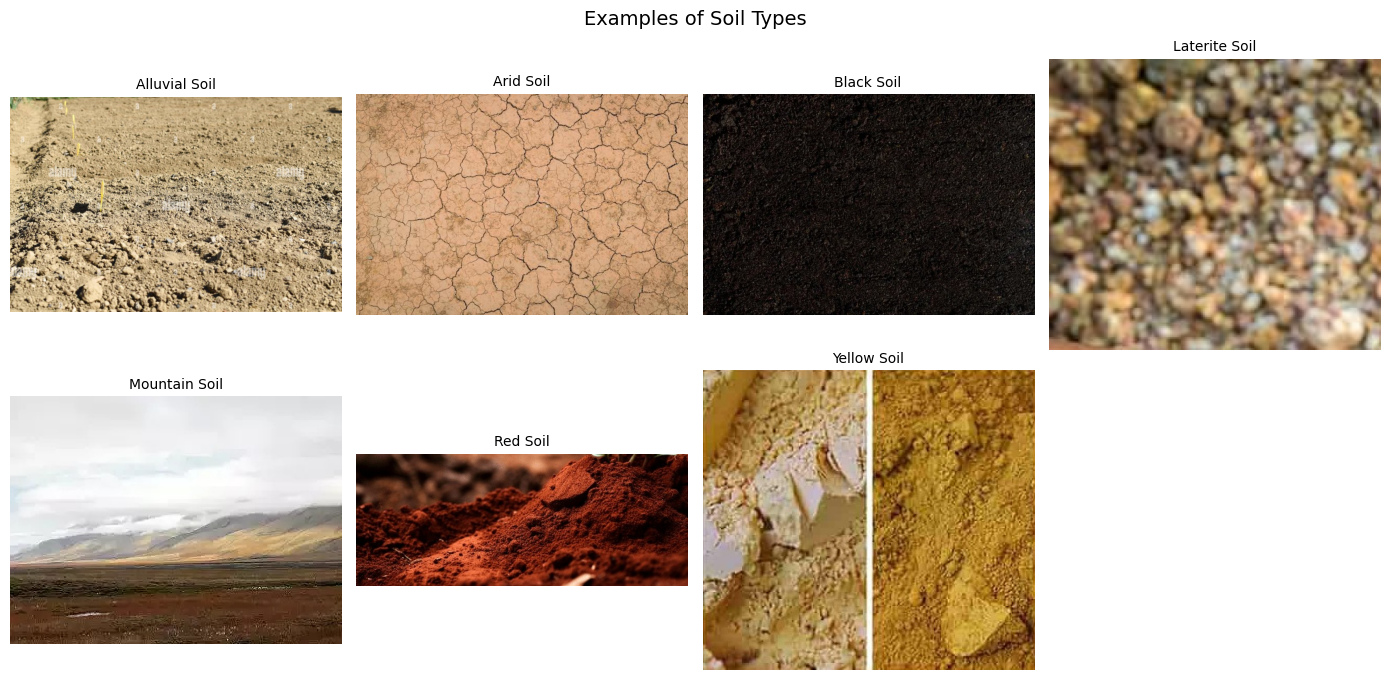

In [11]:
# Grid of examples (1 image per class)
fig, axes = plt.subplots(2, 4, figsize=(14, 7))
axes = axes.flatten()

for idx, cls in enumerate(classes):
    cls_path = DATA_PATH / cls
    images = [f for f in os.listdir(cls_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    
    # Charger une image aléatoire
    img_name = np.random.choice(images)
    img = Image.open(cls_path / img_name)
    
    axes[idx].imshow(img)
    axes[idx].set_title(cls.replace('_', ' '), fontsize=10)
    axes[idx].axis('off')

# Hide the last cell (7 classes, 8 cells)
axes[-1].axis('off')

plt.suptitle('Examples of Soil Types', fontsize=14)
plt.tight_layout()
plt.show()

In [12]:
# Check image sizes
sizes = []
for cls in classes:
    cls_path = DATA_PATH / cls
    for img_name in os.listdir(cls_path):
        if img_name.lower().endswith(('.jpg', '.jpeg', '.png')):
            img = Image.open(cls_path / img_name)
            sizes.append(img.size)

size_counts = Counter(sizes)
print("Image dimensions (width x height):")
for size, count in size_counts.most_common(5):
    print(f"  {size[0]}x{size[1]}: {count} images")

Image dimensions (width x height):
  612x408: 20 images
  626x417: 18 images
  1300x866: 15 images
  540x360: 12 images
  800x534: 10 images
